# Code for classifying emergency and non-emergency vehicle.

In [17]:
import numpy as np


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
img = plt.imread('U:/DataAnalysis/CV101-master/datasets/emergency_classification/images/10.jpg')


In [20]:
img

array([[[177, 179, 194],
        [181, 183, 198],
        [182, 184, 199],
        ..., 
        [ 98,  68,  57],
        [118, 109, 110],
        [ 77,  81,  92]],

       [[186, 188, 203],
        [184, 186, 201],
        [180, 182, 197],
        ..., 
        [105,  75,  64],
        [128, 119, 120],
        [ 82,  86,  97]],

       [[183, 185, 200],
        [175, 177, 192],
        [168, 170, 185],
        ..., 
        [112,  83,  69],
        [141, 132, 133],
        [ 85,  89, 100]],

       ..., 
       [[ 14,  15,  20],
        [ 11,  12,  17],
        [ 11,  12,  17],
        ..., 
        [ 46,  51,  45],
        [ 48,  53,  47],
        [ 51,  56,  50]],

       [[ 19,  18,  24],
        [ 14,  13,  19],
        [ 13,  12,  18],
        ..., 
        [ 44,  49,  43],
        [ 46,  51,  45],
        [ 50,  55,  49]],

       [[ 21,  20,  26],
        [ 16,  15,  21],
        [ 14,  13,  19],
        ..., 
        [ 45,  50,  44],
        [ 41,  46,  40],
        [ 43,  48,

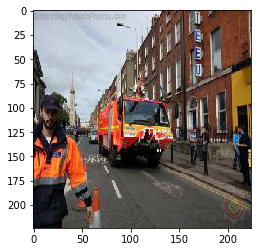

In [21]:
plt.imshow(img)

In [22]:
img.shape # To get the shape of image #Here 224-Height and width and 3rd diemension - contain 3 values of the intensity of pixel

(224, 224, 3)

In [23]:
img[0,0]

array([177, 179, 194], dtype=uint8)

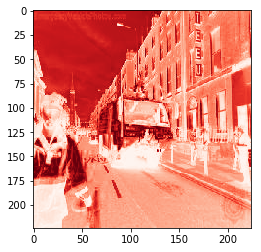

In [25]:
plt.imshow(img[:, :, 0], cmap='Reds')

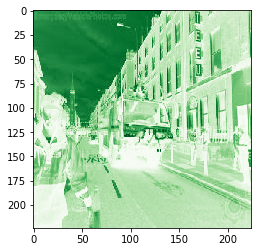

In [26]:
plt.imshow(img[:, :, 1], cmap='Greens')

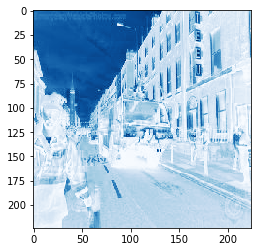

In [27]:
plt.imshow(img[:, :, 2], cmap='Blues')

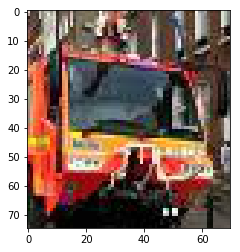

In [32]:
# selecting the patch of image 
patch = img [75:150, 80:150]
plt.imshow(patch)

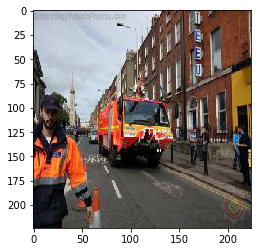

In [33]:
plt.imshow(img)


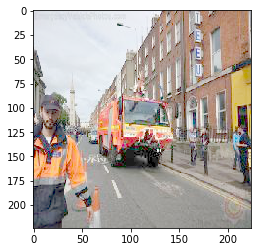

In [39]:
#To increase the brightness of image.

from skimage.exposure import adjust_gamma
plt.imshow(adjust_gamma(img, 0.4))

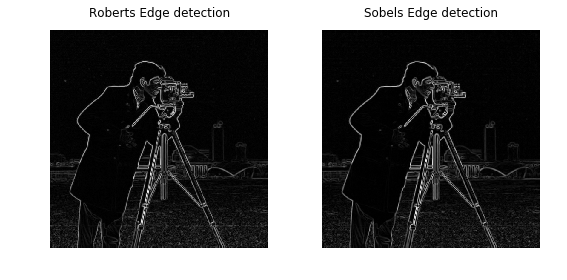

In [45]:
# detecting edges of image
from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt

patch = camera()
#patch=img
edge_roberts = roberts(patch)
edge_sobel = sobel(patch)

fig, ax = plt.subplots(ncols=2, sharex= True, sharey = True, figsize= (8,4))

ax[0].imshow(edge_roberts,cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge detection')


ax[1].imshow(edge_sobel,cmap=plt.cm.gray)
ax[1].set_title('Sobels Edge detection')

for a in ax:
    a.axis('off')
    
plt.tight_layout()
plt.show()

In [46]:
# get random file names withouth changing the name every time

#load the all the filenames in a variable.
#Randomly select any file
#Read and plot the image

from glob import glob

images = glob('U:/DataAnalysis/CV101-master/datasets/emergency_classification/images/*.jpg')
images

['U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\0.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\10.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\100.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1000.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1001.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1002.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1003.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1004.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1005.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1006.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1007.jpg',
 

In [51]:
rng = np.random.RandomState()


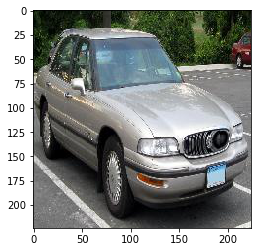

In [57]:
img_name = rng.choice(images)
img = plt.imread(img_name)
plt.imshow(img)

In [58]:
# Read the csv file which has classification.

import pandas as pd
df=pd.read_csv('U:/DataAnalysis/CV101-master/datasets/emergency_classification/emergency_classification.csv')
df.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [59]:
df['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

It is a NON emergency vehicle


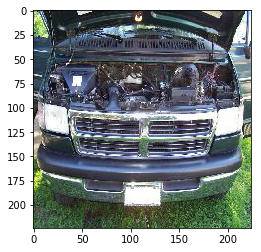

In [71]:
#We nned whole path of the file in image name.

#randomly select the file.
row_index = rng.choice(df.index)

#pick the name of the file
img_name = df.iloc[row_index]['image_names']

#read and plot the image.
img=plt.imread('U:/DataAnalysis/CV101-master/datasets/emergency_classification/images/' + img_name)
plt.imshow(img)
#pick out the class of vehicle.
target = df.iloc[row_index]['emergency_or_not']

#print the class of vehicle
if target == 1:
    print("It is an emergency vehicle.")
else:
    print("It is a NON emergency vehicle")